In [2]:
import wbdata
import pandas as pd
from datetime import datetime
import time

In [4]:

indicator_metadata = wbdata.get_indicators(indicator='FR.INR.RINR')

print(indicator_metadata)

id           name
-----------  ----------------------
FR.INR.RINR  Real interest rate (%)


In [ ]:
# Define your indicators
indicators = {
    'FR.INR.RINR': 'Real Interest Rate',
    'FP.CPI.TOTL.ZG': 'Inflation Rate',
    'FM.LBL.BMNY.ZG': 'Broad Money Growth',
    'PA.NUS.FCRF': 'Exchange Rate (USD)',
    'NY.GDP.MKTP.KD.ZG': 'GDP Growth',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate'
}

# Fetch indicator metadata
indicator_metadata = wbdata.get_indicators(indicator=list(indicators.keys()))

# Display frequency information
for meta in indicator_metadata:
    indicator_id = meta['id']
    name = meta['name']
    frequency = meta.get('frequency', 'N/A')
    print(f"Indicator: {indicator_id} - {name}, Frequency: {frequency}")

In [ ]:
# Define representative countries for each continent
countries = {
    'North_America': ['USA', 'CAN'],
    'South_America': ['BRA', 'ARG'],
    'Europe': ['DEU', 'GBR', 'FRA'],
    'Asia': ['CHN', 'JPN', 'IND'],
    'Africa': ['ZAF', 'NGA', 'EGY'],
    'Oceania': ['AUS', 'NZL']
}

# Define indicators
indicators = {
    'FR.INR.RINR': 'Real Interest Rate',
    'FP.CPI.TOTL.ZG': 'Inflation Rate',
    'FM.LBL.BMNY.ZG': 'Broad Money Growth',
    'PA.NUS.FCRF': 'Exchange Rate (USD)',
    'NY.GDP.MKTP.KD.ZG': 'GDP Growth',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate'
}

# Set date range from January 2017 to now
dates = (datetime(2017, 1, 1), datetime.now())

# Initialize dictionary to store data frames
continent_data = {}

# Fetch data for each continent
for continent, country_list in countries.items():
    continent_dfs = []
    
    for country in country_list:
        try:
            # Add delay to respect API rate limits
            time.sleep(2)
            df = wbdata.get_dataframe(indicators, country=country, convert_date=False, data_date=dates)
            df.columns = [f"{col}_{country}" for col in df.columns]
            continent_dfs.append(df)
        except Exception as e:
            print(f"Error fetching data for {country}: {e}")
    
    # Combine all country data for the continent
    if continent_dfs:
        continent_data[continent] = pd.concat(continent_dfs, axis=1)
        
        # Clean and save data
        continent_data[continent] = continent_data[continent].sort_index()
        continent_data[continent] = continent_data[continent].fillna(method='ffill')
        continent_data[continent].to_csv(f'data/economic_indicators_{continent}.csv')

# Create consolidated dataset
all_data = pd.concat(continent_data.values(), axis=1)
all_data.to_csv('data/economic_indicators_all.csv')

print("Data collection complete. Check CSV files for results.")

Error fetching data for USA: got an unexpected keyword argument 'convert_date'
Error fetching data for CAN: got an unexpected keyword argument 'convert_date'
Error fetching data for BRA: got an unexpected keyword argument 'convert_date'
Error fetching data for ARG: got an unexpected keyword argument 'convert_date'
Error fetching data for DEU: got an unexpected keyword argument 'convert_date'
Error fetching data for GBR: got an unexpected keyword argument 'convert_date'
Error fetching data for FRA: got an unexpected keyword argument 'convert_date'
Error fetching data for CHN: got an unexpected keyword argument 'convert_date'
Error fetching data for JPN: got an unexpected keyword argument 'convert_date'
Error fetching data for IND: got an unexpected keyword argument 'convert_date'
Error fetching data for ZAF: got an unexpected keyword argument 'convert_date'
Error fetching data for NGA: got an unexpected keyword argument 'convert_date'
Error fetching data for EGY: got an unexpected keywo

ValueError: No objects to concatenate

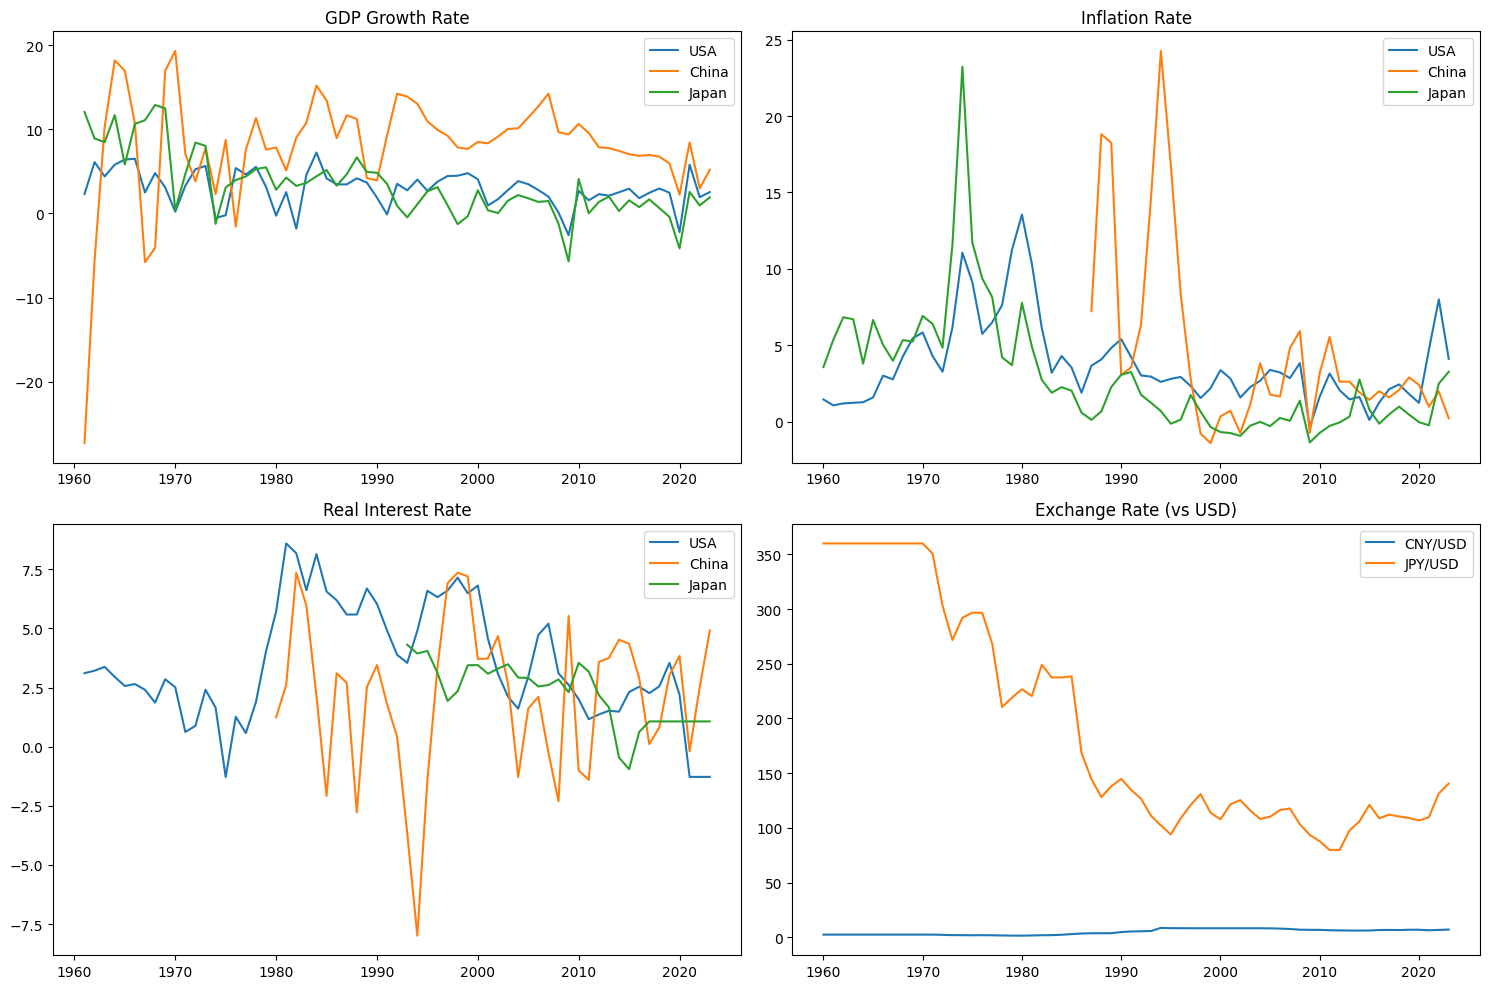

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('economic_indicators_all.csv')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot GDP Growth
axes[0,0].plot(df['date'], df['GDP Growth_USA'], label='USA')
axes[0,0].plot(df['date'], df['GDP Growth_CHN'], label='China')
axes[0,0].plot(df['date'], df['GDP Growth_JPN'], label='Japan')
axes[0,0].set_title('GDP Growth Rate')
axes[0,0].legend()

# Plot Inflation Rate
axes[0,1].plot(df['date'], df['Inflation Rate_USA'], label='USA')
axes[0,1].plot(df['date'], df['Inflation Rate_CHN'], label='China')
axes[0,1].plot(df['date'], df['Inflation Rate_JPN'], label='Japan')
axes[0,1].set_title('Inflation Rate')
axes[0,1].legend()

# Plot Real Interest Rate
axes[1,0].plot(df['date'], df['Real Interest Rate_USA'], label='USA')
axes[1,0].plot(df['date'], df['Real Interest Rate_CHN'], label='China')
axes[1,0].plot(df['date'], df['Real Interest Rate_JPN'], label='Japan')
axes[1,0].set_title('Real Interest Rate')
axes[1,0].legend()

# Plot Exchange Rate
axes[1,1].plot(df['date'], df['Exchange Rate (USD)_CHN'], label='CNY/USD')
axes[1,1].plot(df['date'], df['Exchange Rate (USD)_JPN'], label='JPY/USD')
axes[1,1].set_title('Exchange Rate (vs USD)')
axes[1,1].legend()

plt.tight_layout()
plt.show()
